# 0. Overview
- This is a introductory project for Triple C data scientist, focusing on the area of EDA and Machine Learning. In order to complete this project, you have to fork this git repo to your own GitHub account and work on it there. 

- Dataset: https://www.kaggle.com/c/titanic/overview
- Reference: https://www.kaggle.com/rbud613/taitanic-eda/comments#846113
- Pre-requisite:
    - Knowledge of numpy and Python pandas;
    - Knowledge of machine learning concepts;
    - Passion to learn;
    - Ready to ask question (to both Google and your Tech Lead).
- Objective:
    - Understanding the basic ML model building procedure (for classification problem).

---------

# 1. Get Started
- **Overview**: In this section, you will load the necessary data for this project and corresponding explanation of it. 

## 1.1. Check for requirements - Only run this part if you are in virtual environment!!

In [19]:
# !pip install -r requirements.txt # Un-comment this line if you are in virtual environment 

## 1.2. Getting the Data
- First, let's take a look at the data we are going to use
- Essentially, this dataset includes the data of each Titanic passengers, as well as whether they survived from the great tragedy.
- There is **1 problem** in this section

In [20]:
import pandas as pd

**Problem 1.1:** Use pandas libary to read in the data we need (i.e. train.csv & test.csv)

In [21]:
# Your Code Starts Here
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [22]:
# First few lines of training set (i.e. the data WITH known labels)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
# First few lines of test set (i.e. the data WITHOUT known labels)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


![Data Dictionary](./data/data_dictionary.png)


- Variable Notes (aka passenger info)
    - pclass: A proxy for socio-economic status (SES)
        - 1st = Upper
        - 2nd = Middle
        - 3rd = Lower

    - age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

    - sibsp: The dataset defines family relations in this way...
        - Sibling = brother, sister, stepbrother, stepsister
        - Spouse = husband, wife (mistresses and fiancés were ignored)

    - parch: The dataset defines family relations in this way...
        - Parent = mother, father
        - Child = daughter, son, stepdaughter, stepson
        - Some children travelled only with a nanny, therefore parch=0 for them.

- **Take a few minutes to look at the dataset and get an idea of it**
---------

# 2. Prediction
- **Overview**: In this section, we will entering the second part of our project: making prediction using known information.
- The data has been split into two groups:
  - training set (data/train.csv)
  - test set (data/test.csv)

- The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the **“ground truth”**) for each passenger, aka whether each passerger survived or not (shown in column **Survived**)

- The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger (aka there is no column **Survived**). It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

- For the final submission, take a look at the `gender_submission.csv` below. It is a set of predictions that **assume** all and only female passengers survive, as an example of what a submission file should look like.

`References`: 
- 1. https://www.kaggle.com/c/titanic/overview
- 2. https://www.kaggle.com/ash316/eda-to-prediction-dietanic

`Submission to:` https://www.kaggle.com/c/titanic/submit

In [24]:
# Example of final submission file - this is the kind of file you want to output at the end of the project
pd.read_csv('data/gender_submission.csv').head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


**Note:** Just run the following cell. It is making a new, concated dataframe of all the data we have, with a new column "dataset" describing which dataset each row comes from. We will do the following **feature engineering** and **Train-Validation-Test** split on this large table.

In [25]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

train['dataset'] = 'Train'
test['dataset'] = 'Test'

data = pd.concat([train, test]).reset_index(drop = True)
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,dataset
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Train


## 2.1 Feature Understanding
- In this section, we will first examinate the **correlation** between features and the the **instrinsic characteristics** of each features - this will give us ideas about which features to use in the prediction model.
- **Note:** there is nothing to do in this section, all you need to do is get familiar with **the use of heatmap function** and **understand what it means**. 


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline

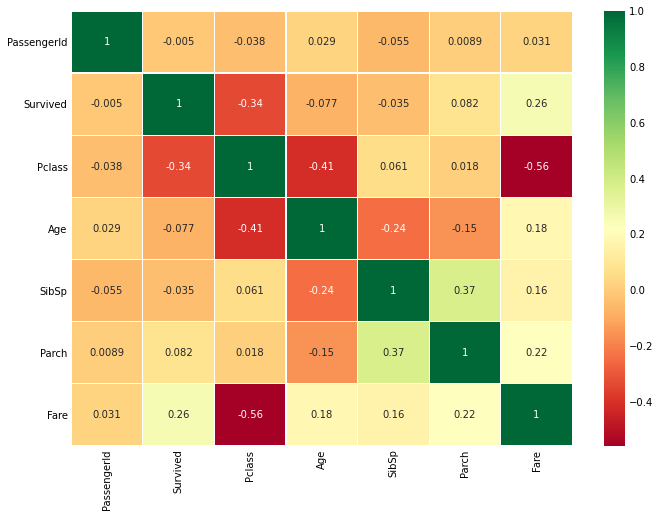

In [27]:
sns.heatmap(data.corr(), annot = True, cmap = 'RdYlGn' , linewidths = 0.2) # data.corr() --> correlation matrix
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

## 2.2. Feature Engineering & Pre-processing
- In this section, we will look at the second step in Machine Learning: Feature Engineering. That is to say, we would decide which feature could be useful for the model to make the decision. Essentially, we could select features either followed by some heuristics from observation/EDA, or by some algorithm/statistics. Moreover, we could also manually create some feature by taking the combination/permutation of two or more features.
- From the *personal perspective*, this is really the most **crutial** part of machine learning: unlike the deep learning model (CNN, RNN, etc.), which automatically looks for features themselves, feature engineering makes machine just to focus on optimization and fitting problems. **This is what makes us human: summarizing from our knowledge and help the machine to learn a lot.**
- From the *practical perspective*, feature engineering is also important: for the machine, it's hard to understand some of the easy features to human (e.g. string). Instead, machines are good at understanding a number, a vector and a matrix. **Therefore, another key aspect of feature engineering is to convert our data into a format that's easily understood by machine.**


- **In this section, we will look at the following feature engineering techniques that's commonly used.** However, since Titanic dataset is somewhat simple, I would suggest the following [artical](https://towardsdatascience.com/feature-engineering-for-machine-learning-3a5e293a5114) where feature engineering is better summarized. 
    - **Imputation**: handle missing values by filling them up with appropriate alternatives
    - **Binning**: grouping some continues values into several bins
    - **Feature Split / Combination**: Split / Combining features
    - **One-Hot Encoding**: encode catogerical data
    - **Pipeline**: handle various encoding

### 2.2.1 Initials / Ages (Imputation)
- The first thing we'd like to investigate is whether age could decide one's survival
- If you remember, there are lots of `nan` in the `Age` column, in order to fill those blanks with appropriate age, what we will do is to find the initial of every person and find the average age for each initial.
- Then we will fill those `nan` in `Age` column with average age of that initial. (**Think about this, does this make sense?**)

In [28]:
import re # Use regular expression（正则表达式）

# Do Not modify this cell, just run it.
data['initial'] = data.Name.apply(lambda s: re.findall(r'([A-Za-z]+)\.', s)[0]) 
data[['Name', 'initial']].head()

,Name,initial
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


- For more information about the use of regular expression, here is a useful link: [Python regular expression](https://www.tutorialspoint.com/python/python_reg_expressions.htm)
- **It is not required for you to know regular expression for this project, but it's encouraged to learn it on your own (it takes a while to understand it!).**

- Now, take a look at our results of initials:

In [29]:
# As you can see here, there is too many unique initials, 
# while some of them could be manually classified into the same one 
data.initial.unique() 

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [30]:
# DO NOT modify this cell, just run it (try to understand the use of pd.replace() function!)
data.initial = data.initial.replace(
    ['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
    ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Miss']
)

In [31]:
data.initial.unique() # Looks good now!

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

**Problem 2.1:** Calculate the **average age** for each initial groups; then, fill up the `nan` values in the `Age` column.
- Hint: make use of `pd.groupby()` function, [link to doc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)
- Hint: make use of `pd.fillna()` function, [link to doc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)

In [33]:
# Your Code Starts Here
data.Age.isnull().sum()

263

In [14]:
# Your Code Starts Here
data.loc[(data.Age.isnull()) & (data.initial == 'Mr'), 'Age'] = 33
data.loc[(data.Age.isnull()) & (data.initial == 'Mrs'), 'Age'] = ...
data.loc[(data.Age.isnull()) & (data.initial == 'Master'), 'Age'] = ...
data.loc[(data.Age.isnull()) & (data.initial == 'Miss'), 'Age'] = ...
data.loc[(data.Age.isnull()) & (data.initial == 'Other'), 'Age'] = ...

### 2.2.2 Age band (Binning)
- In this section, we will do binning in the age column, where we assign a group number to each bin

**Problem 2.2:** Implement the function `handle_age_band` and apply it to the train dataframe. 
- Hint: use `pd.apply()` function

In [ ]:
# Function to handle age band implementation
# [0-16]: 0
# [17-32]: 1
# [33-48]: 2
# [49-64]: 3
# [>64]: 4
def handle_age_band(age):
    if age <= 16:
        return 0
    # Your Code Starts Here  
    return -1 # Modify here
    # Your Code Ends Here


# Your Code Starts Here
data['age_band'] = ...
# Your Code Ends Here
data.head(2)

### 2.2.3 Family Size (Feature Combination)
- we would also like to investigate whether family size have an impact on passenger's survival

- **Problem 2.3:** Here we create a new feature called `family_size` which is the sum of `Parch` and `SibSp` columns for each row; also, create another column called `alone` where 1 means traveling without families and 0 otherwise.

In [ ]:
# Your Code Starts Here
data['family_size'] = ...
data['alone'] = ... # hint: make use of pd.apply() function on family_size column
# Your Code Ends Here

### 2.2.4 Checking null values again

In [ ]:
data.isna().sum()

Survived       418
Pclass           0
Sex              0
SibSp            0
Parch            0
Fare             0
Embarked         0
dataset          0
initial          0
age_band         0
family_size      0
alone            0
dtype: int64

**Problem 2.4:** Fill up the remaining null values in the dataframe
- Hint: make use of `pd.fillna()` function, [link to doc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)

In [ ]:
# # Examples
# data.Embarked = data.Embarked.fillna('S') # Because 'S' is the most common embark (登船) location.

# # TODO: handle other null values, if there is any; if not, just ignore it
# # Note: if there is null in the 'Survived' column, it's fine.

# # Your Code Starts Here
# data.Fare = ... # Fill the nan values in fare columns with median value of passenger fare.
# # Your Code Ends Here

In [ ]:
# Drop un-needed features
data = data.drop(columns = ['Name', 'Ticket', 'PassengerId', 'Cabin', 'Age'])

### 2.2.5 One-hot Encoding
- In this section, we will look at another important feature engineering process, specially designed for categorical data: **One-hot Encoding**.
- The idea behind one-hot encoding is simple: instead of using categorical labels, we use several seperate columns for each label (see example below).
- Through one-hot encoding, we could tramsfrom data from some format that the model couldn't take as an input(text, image, etc) into vectors that the model could calculate.

In [ ]:
# Original data
original = pd.DataFrame({
    'name': ['Joey', 'Scott', 'Jasmine', 'Alan', 'Mao'],
    'Major': ['DataSci', 'DataSci', 'CogsSci', 'DataSci', 'CompSci']
})
onehot = pd.DataFrame({
    'name': ['Joey', 'Scott', 'Jasmine', 'Alan', 'Mao'],
    'DataSci': [1, 1, 0, 1, 0],
    'CogsSci': [0, 0, 1, 0, 0],
    'CompSci': [0, 0, 0, 0, 1]
})

display(original, onehot)

,name,Major
0,Joey,DataSci
1,Scott,DataSci
2,Jasmine,CogsSci
3,Alan,DataSci
4,Mao,CompSci


,name,DataSci,CogsSci,CompSci
0,Joey,1,0,0
1,Scott,1,0,0
2,Jasmine,0,1,0
3,Alan,1,0,0
4,Mao,0,0,1


- The way to achieve these encoded features is simple: Sci-kit Learn already has package for this:
    - [One-hot Encoder from Scikit](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)
    - **Note**: the output for this transformer is a matrix, which is kind of hard to debug.

In [ ]:
# This is a quick way of "query" into the dataframe, like a SQL query. 
train = data.query('dataset == "Train"').drop(columns = ['dataset'])

# We don't need survived column for test set.
test = data.query('dataset == "Test"').drop(columns = ['Survived', 'dataset']) 

In [ ]:
train, y_train = train.drop(columns = ['Survived']), train.Survived.values

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = ... # remember to set 'handle_unknown' to 'ignore'!
enc.fit(...)

In [ ]:
enc.categories_

[array(['Master', 'Miss', 'Mr', 'Mrs', 'Other'], dtype=object)]

In [ ]:
enc.transform(X_train[['initial']]) # As you can see, the result is a sparse matrix

<891x5 sparse matrix of type '<class 'numpy.float64'>'
	with 891 stored elements in Compressed Sparse Row format>

In [ ]:
print('Shape of encoded:', enc.transform(X_train[['initial']]).todense().shape)
enc.transform(X_train[['initial']]).todense() # take a look a it, it's a matrix

Shape of encoded: (891, 5)


matrix([[0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0.],
        ...,
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0.]])

### 2.2.6 Pipeline
- Now, we will integrate **one-hot encoding** with **other features** we created!

In [ ]:
train.head(2)

,Pclass,Sex,SibSp,Parch,Fare,Embarked,initial,age_band,family_size,alone
0,3,male,1,0,7.2500,S,Mr,1,1,0
1,1,female,1,0,71.2833,C,Mrs,2,1,0


In [ ]:
# handle application features
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

identical_transformer = FunctionTransformer(lambda x: x)
num_feat = ['Fare']
num_trans = Pipeline(
    steps = [
        ('scalar', StandardScaler())
    ])

one_hot = OneHotEncoder(handle_unknown = 'ignore')
cat_feat = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'initial', 'age_band', 'family_size', 'alone']
cat_trans = Pipeline(
    steps = [
        ('onehot', one_hot)
    ])

ct = ColumnTransformer(
    transformers = [
        ('num', num_trans, num_feat),
        ('cat', cat_trans, cat_feat)
    ])
ct = ct.fit(train)

In [ ]:
X_train = ct.transform(train)
X_test = ct.fit_transform(test)

In [ ]:
print(X_train.shape, y_train.shape, X_test.shape)

(891, 44) (891,) (418, 45)


**Problem 2.5:** Make another heatmap similar to the one in section 3.1.

In [ ]:
# Your Code Starts Here


# Your Code Ends Here

## 2.3. Model Selection
- In this section, we will look at the procedure of making a model selection. In particular, we will look at two ways of find the best model: **manual search** and **k-fold cross validation**

In [ ]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.naive_bayes import GaussianNB #Naive bayes

from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

### 2.3.1 Manual Trying
- In this section, we wil manually try various model with various parameters. 
- Before using models, we will further split our training set into two parts: `train` and `validation`. The reason behind this is that: we what to make sure the model we used on the testing set is the best model we can get, therefore, we need an objective measurement of "goodness" of model, which should be on a set of data that the model has not seen before -> validation set.

In [ ]:
X, y = X_train.copy(), y_train.copy() # Save the training set for future use
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.33, random_state = 42)

- After creating validation set, we started to try some Sci-kit models for machine learning:
    - `SVC ` (Support Vector Classification)
    - `Logistic Regression`
- For both of them, we will try various model parameters in order to find out the best model

In [ ]:
# SVC model
model = svm.SVC(kernel = 'rbf', C = 1, gamma = 0.1)
model.fit(X_train, y_train)
prediction1 = model.predict(X_val)
print('Val acc for rbf SVM is ', metrics.accuracy_score(prediction1, y_val))

Val acc for rbf SVM is  0.8440677966101695


- **Problem 2.6**: 
    - First, read the following two page for the documentation of [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) and [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). Pay additional attention to the parameter `C` and `gamma`
    - Second, copy the code from above and try various `C` and `gamma` values
    - Then, Try to use `Logistic Regression` on the same data (try `C` = 0.1, 1, 10 and keep the one w/ best acc)

In [ ]:
# Your Code Starts Here - SVC


# Your Code Ends Here

In [ ]:
# Your Code Starts Here - Logistic Regression


# Your Code Ends Here

### 2.3.2 Cross-validation
- Another common way of validation is to use k-fold cross-validation. The idea behind this is to use the entire training set instead of using a hold-out validation set like we did previously. The way to achieve validation is by doing the following:
    - Break the training set into k folds / groups
    - Each iteration, fit a model with k-1 folds and calculate its performance on the last fold. 
    - Change the valitation 'fold' for each time
- In this section, you will fill in some blanks in order to complete the training.
- Hint: [Doc for KFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) and [Doc for cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)


-----
- **Problem 2.7:** Finish the Cross-Validation process below

In [ ]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits = 10, random_state = 24) # k = 10, split the data into 10 equal parts
cv_mean = []
accuracy = []
std = []
classifiers = ['Linear Svm', 'Radial Svm', 'Logistic Regression', 'KNN', 'Decision Tree',\
               'Random Forest']

# Your Code Starts Here
# TODO: fill in additional models
# Some suggestions: LogisticRegression, KNeighborsClassifier, DecisionTreeClassifier, RandomForestClassifier
models = [svm.SVC(kernel = 'linear'), ...]  
# Your Code Ends Here

for model in models:
    # TODO: fill in needed arguments, remeber to fill in 'scoring' and 'cv' 
    cv_result = cross_val_score(...) 
    # Your Code Ends Here
    
    cv_mean.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)

new_models_dataframe = pd.DataFrame({'CV Mean': cv_mean, 'Std': std}, index = classifiers)       
new_models_dataframe

## 3.4. Model Testing
- From the dataframe above, we can see the model with best accuracy and most stable (lower std)
- Now, pick the best model
- **Problem 2.8:** Pick the best model and finish the test prediction

In [ ]:
# Your Code Starts Here
model = ... # Pick the best model
# Your Code Ends Here

model.fit(X, y)
prediction = model.predict(X_test)

test['PassengerId'] = test.index
test['Survived'] = prediction1
test.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked,initial,age_band,family_size,alone
891,3,male,0,0,7.8292,Q,Mr,2,0,1
892,3,female,1,0,7.0000,S,Mrs,2,1,0
893,2,male,0,0,9.6875,Q,Mr,3,0,1
894,3,male,0,0,8.6625,S,Mr,1,0,1
895,3,female,1,1,12.2875,S,Mrs,1,2,0
...,...,...,...,...,...,...,...,...,...,...
1304,3,male,0,0,8.0500,S,Mr,2,0,1
1305,1,female,0,0,108.9000,C,Miss,2,0,1
1306,3,male,0,0,7.2500,S,Mr,2,0,1
1307,3,male,0,0,8.0500,S,Mr,2,0,1


## 3.5. Export Prediction & Submission
- Submit to this website: https://www.kaggle.com/c/titanic/submit

In [ ]:
# Make sure your submission looks like this
pd.read_csv('data/gender_submission.csv').head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
test[['PassengerId', 'Survived']].to_csv('submission.csv', index = False)

# The End.